In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('walmart_retail_dataset.csv')
df.head()

,order_id,order_date,order_priority,ship_date,ship_mode,customer_id,customer_age,customer_segment,country,city,...,region,product_id,product_category,product_sub_category,product_name,sales,unit_price,order_quantity,discount,profit
0,ddb2de3d-ded3-4715-97cf-69becc54d95a,16-03-2022,Low,18-03-2022,Express Air,a2b28c3f,59,Corporate,United States,Bullhead City,...,West,eeb8cd3f,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,839.07,279.81,3,0.12,8584.44253
1,c4d92cf0-fee8-41e8-904d-b132eb429e24,26-09-2019,Critical,01-10-2019,Delivery Truck,0375660f,73,Consumer,United States,Grand Island,...,Central,f235a01b,Technology,Copiers and Fax,Canon PC1080F Personal Copier,25791.40,599.99,43,0.19,14583.60689
2,cc09b9ad-a17d-42bf-835e-d35cc66e30f9,10-09-2022,High,15-09-2022,Delivery Truck,fb823f3d,43,Home Office,United States,Georgetown,...,Central,44f572ea,Technology,Computer Peripherals,Gyration Ultra Cordless Optical Suite,1108.47,100.97,11,0.20,12245.47225
3,7c955c6b-ca70-4b97-a9f8-a38af866b506,10-02-2022,Critical,11-02-2022,Regular Air,17771651,30,Consumer,United States,Dix Hills,...,East,e56df987,Furniture,Tables,Hon Rectangular Conference Tables,1365.18,227.55,6,0.02,-8526.40009
4,8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a,02-11-2020,Not Specified,04-11-2020,Regular Air,8e721b69,44,Small Business,United States,Harker Heights,...,Central,20018a8c,Furniture,Tables,Balt Split Level Computer Training Table,3189.41,138.75,23,0.08,9616.03084


In [5]:
df.size

550000

In [6]:
df.shape

(25000, 22)

In [7]:
df.columns

Index(['order_id', 'order_date', 'order_priority', 'ship_date', 'ship_mode',
       'customer_id', 'customer_age', 'customer_segment', 'country', 'city',
       'state', 'zip_code', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'unit_price',
       'order_quantity', 'discount', 'profit'],
      dtype='object')

In [8]:
data = df.drop(columns=['order_priority', 'ship_date', 'ship_mode', 'customer_segment', 'zip_code', 'unit_price'])
data.head()

,order_id,order_date,customer_id,customer_age,country,city,state,region,product_id,product_category,product_sub_category,product_name,sales,order_quantity,discount,profit
0,ddb2de3d-ded3-4715-97cf-69becc54d95a,16-03-2022,a2b28c3f,59,United States,Bullhead City,Arizona,West,eeb8cd3f,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,839.07,3,0.12,8584.44253
1,c4d92cf0-fee8-41e8-904d-b132eb429e24,26-09-2019,0375660f,73,United States,Grand Island,Nebraska,Central,f235a01b,Technology,Copiers and Fax,Canon PC1080F Personal Copier,25791.40,43,0.19,14583.60689
2,cc09b9ad-a17d-42bf-835e-d35cc66e30f9,10-09-2022,fb823f3d,43,United States,Georgetown,Texas,Central,44f572ea,Technology,Computer Peripherals,Gyration Ultra Cordless Optical Suite,1108.47,11,0.20,12245.47225
3,7c955c6b-ca70-4b97-a9f8-a38af866b506,10-02-2022,17771651,30,United States,Dix Hills,New York,East,e56df987,Furniture,Tables,Hon Rectangular Conference Tables,1365.18,6,0.02,-8526.40009
4,8a7c4dd1-cf7e-47d9-9afe-71b56776ad1a,02-11-2020,8e721b69,44,United States,Harker Heights,Texas,Central,20018a8c,Furniture,Tables,Balt Split Level Computer Training Table,3189.41,23,0.08,9616.03084


In [9]:
data.shape

(25000, 16)

In [10]:
data.columns

Index(['order_id', 'order_date', 'customer_id', 'customer_age', 'country',
       'city', 'state', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'order_quantity',
       'discount', 'profit'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'region' column
data['region_encoded'] = label_encoder.fit_transform(data['region'])

# Display the encoded 'region' column
print(data['region_encoded'])


0        3
1        0
2        0
3        1
4        0
        ..
24995    0
24996    2
24997    2
24998    2
24999    2
Name: region_encoded, Length: 25000, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'region' column
data['category'] = label_encoder.fit_transform(data['product_category'])

# Display the encoded 'region' column
print(data['category'])


0        1
1        2
2        2
3        0
4        0
        ..
24995    2
24996    0
24997    0
24998    1
24999    1
Name: category, Length: 25000, dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'region' column
data['sub_category'] = label_encoder.fit_transform(data['product_sub_category'])

# Display the encoded 'region' column
print(data['sub_category'])

0         0
1         5
2         4
3        14
4        14
         ..
24995     4
24996    14
24997     8
24998    11
24999    10
Name: sub_category, Length: 25000, dtype: int64


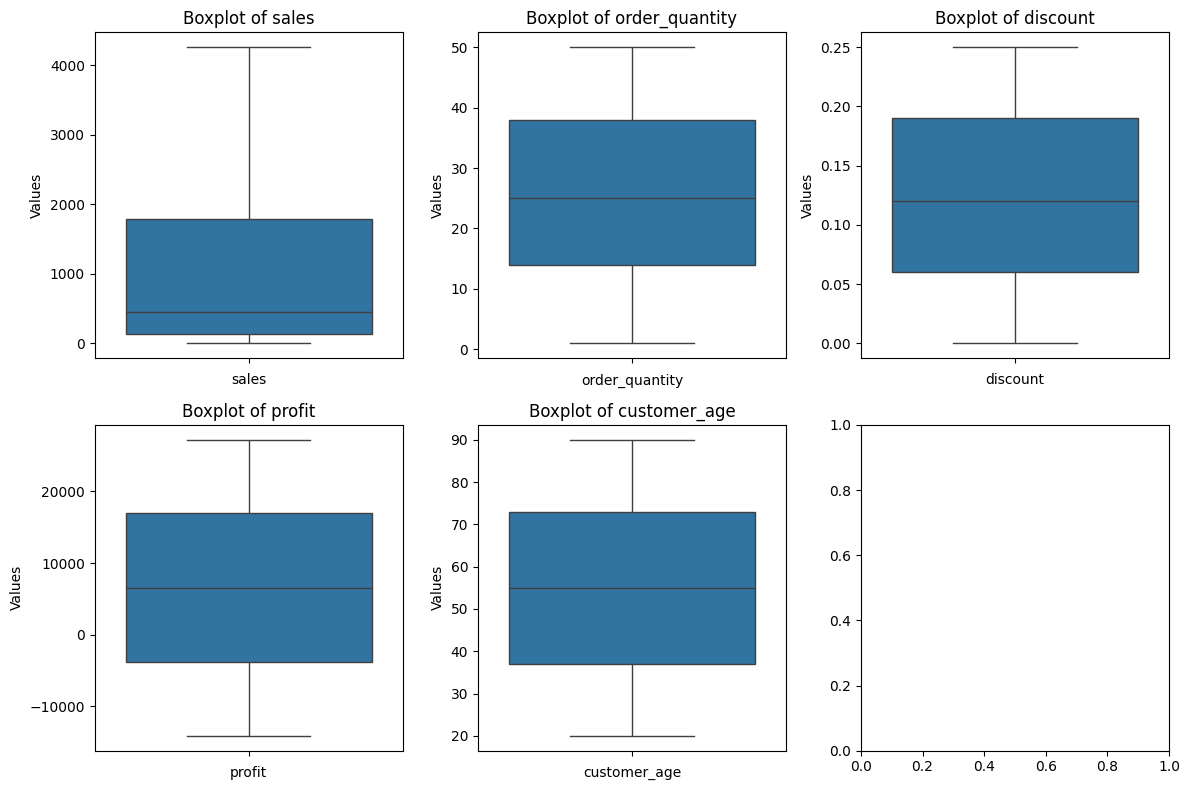

In [30]:
# Assuming df is your DataFrame

# Define a function to cap outliers in a column
# Define a function to cap outliers in a column
def cap_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower_bound, upper_bound)

# Cap outliers in specified numeric columns
numeric_columns = ['sales', 'order_quantity', 'discount', 'profit','customer_age']
data[numeric_columns] = data[numeric_columns].apply(cap_outliers_iqr)

# Create a single figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plot boxplots for each capped feature as subplots
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(y=data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}', fontsize=12)
    axes[row, col].set_xlabel(column, fontsize=10)
    axes[row, col].set_ylabel('Values', fontsize=10)

plt.tight_layout()
plt.show()

In [31]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assume you have data loaded and columns_to_plot defined

# Create subplots with 2 rows and ceil(len(columns_to_plot)/2) columns
fig = make_subplots(rows=2, cols=-(-len(columns_to_plot)//2), subplot_titles=columns_to_plot)

# Plot histograms for each column
for i, column in enumerate(columns_to_plot, start=1):
    row = i // ((len(columns_to_plot) + 1) // 2) + 1
    col = i % ((len(columns_to_plot) + 1) // 2)
    if col == 0:
        col = -(-len(columns_to_plot)//2)
    fig.add_trace(go.Histogram(x=data[column].dropna(), marker_color='skyblue', name=column), row=row, col=col)

# Update layout
fig.update_layout(height=600, width=1000, title_text="Histograms of Various Columns", showlegend=False)

# Show plot
fig.show()


In [17]:
age_20_40 = data.customer_age[(data.customer_age >= 20) & (data.customer_age <= 40)]
age_41_60 = data.customer_age[(data.customer_age >= 41) & (data.customer_age <= 60)]
age_61_80 = data.customer_age[(data.customer_age >= 61) & (data.customer_age <= 80)]
age_80above = data.customer_age[data.customer_age >= 80]



In [18]:
x_age = ['20-40', '41-60', '61-80','80+']
y_age = [len(age_20_40.values), len(age_41_60.values), len(age_61_80.values), len(age_80above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')


In [32]:
data.columns

Index(['order_id', 'order_date', 'customer_id', 'customer_age', 'country',
       'city', 'state', 'region', 'product_id', 'product_category',
       'product_sub_category', 'product_name', 'sales', 'order_quantity',
       'discount', 'profit', 'region_encoded', 'category', 'sub_category'],
      dtype='object')

### **kmeans Clustering**

### **Spending Habits**

In [33]:
X1 = data.iloc[:, [12, 13, 14, 15]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

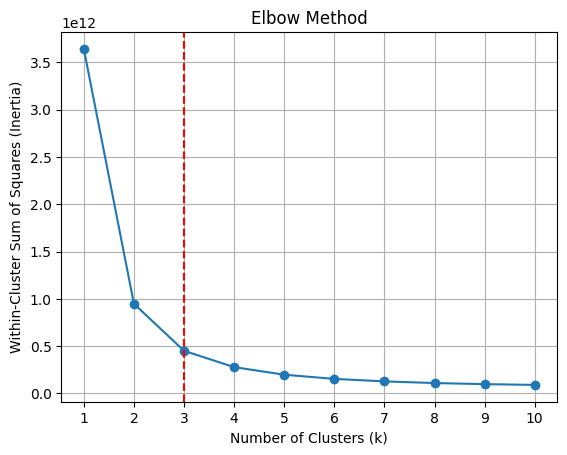

In [41]:
from sklearn.cluster import KMeans


# Define the range of clusters to test
k_values = range(1, 11)  # Test clusters from 1 to 10

# Initialize list to store the within-cluster sum of squares (inertia) for each k
inertia_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(X1)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_values)
plt.grid(True)

# Find the elbow point (optimal value of k)
optimal_k = 3  # Example, you need to determine this programmatically
plt.axvline(x=optimal_k, color='r', linestyle='--')  # Add a dotted line at the optimal value of k

plt.show()



In [35]:

# Define the optimal number of clusters (k)
optimal_k = 3  # Example, replace with the actual optimal value of k

# Initialize KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X1)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster Labels:", cluster_labels)

# Print the centroids of the clusters
print("Cluster Centroids:\n", kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster Labels: [1 0 1 ... 2 1 0]
Cluster Centroids:
 [[ 1.22119987e+03  2.56433361e+01  1.22999647e-01  2.02385078e+04]
 [ 1.21160237e+03  2.55133606e+01  1.25297304e-01  6.27216140e+03]
 [ 1.17338284e+03  2.53884752e+01  1.25943108e-01 -7.42209857e+03]]


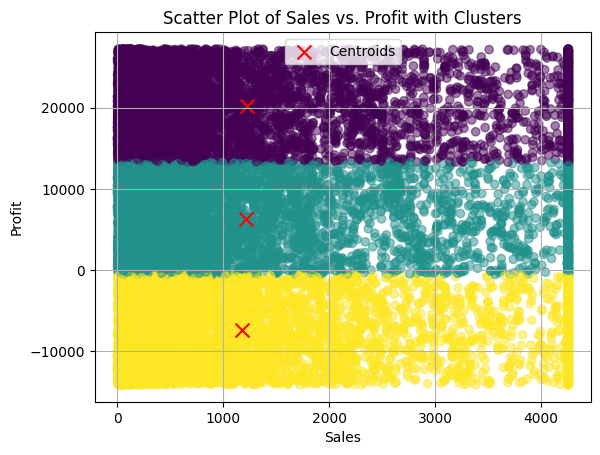

In [36]:

# Scatter plot of the data points colored by cluster labels
plt.scatter(X1['sales'], X1['profit'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], marker='x', c='red', s=100, label='Centroids')
plt.title('Scatter Plot of Sales vs. Profit with Clusters')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()


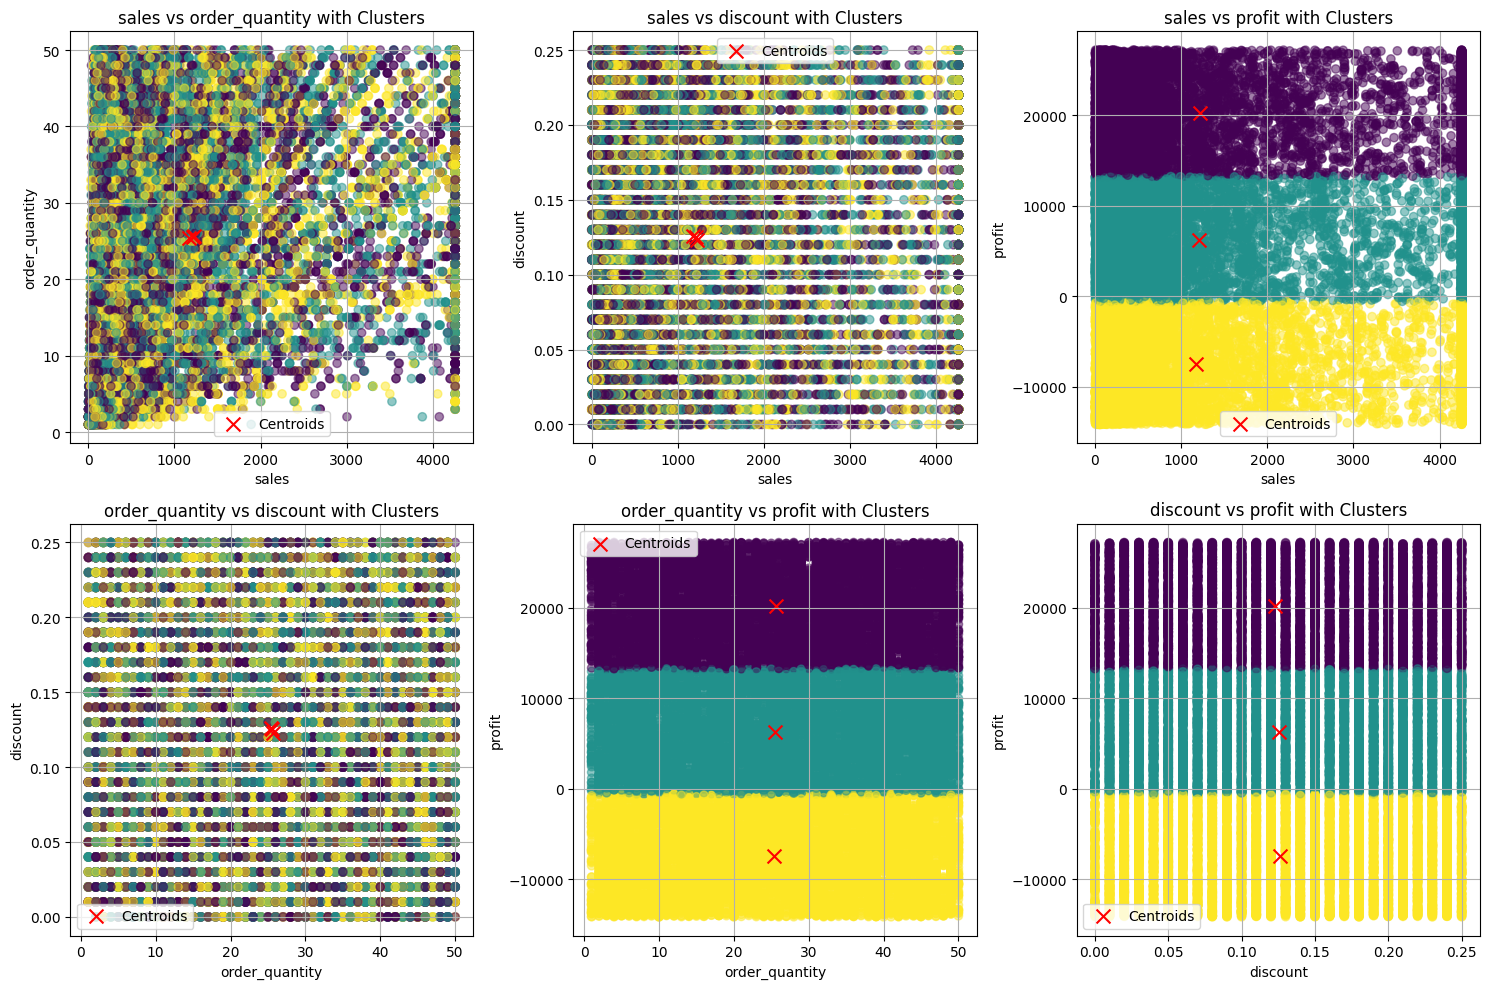

In [37]:
import itertools
import matplotlib.pyplot as plt

# Get all combinations of pairs from the features
feature_pairs = list(itertools.combinations(X1.columns, 2))

# Create subplots for each pair
num_pairs = len(feature_pairs)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_pairs + num_cols - 1) // num_cols  # Number of rows needed based on the number of pairs
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot scatter plot for each pair
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    ax.scatter(X1[x_feature], X1[y_feature], c=cluster_labels, cmap='viridis', alpha=0.5)
    ax.scatter(kmeans.cluster_centers_[:, X1.columns.get_loc(x_feature)], kmeans.cluster_centers_[:, X1.columns.get_loc(y_feature)], marker='x', c='red', s=100, label='Centroids')
    ax.set_title(f'{x_feature} vs {y_feature} with Clusters')
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [54]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(X1, cluster_labels_optimal)

# Print the silhouette score
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: -0.002723709559593538


# **Product Prefrences**

In [39]:
X2 = data.iloc[:,[17,18]]
X2.head()

,category,sub_category
0,1,0
1,2,5
2,2,4
3,0,14
4,0,14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

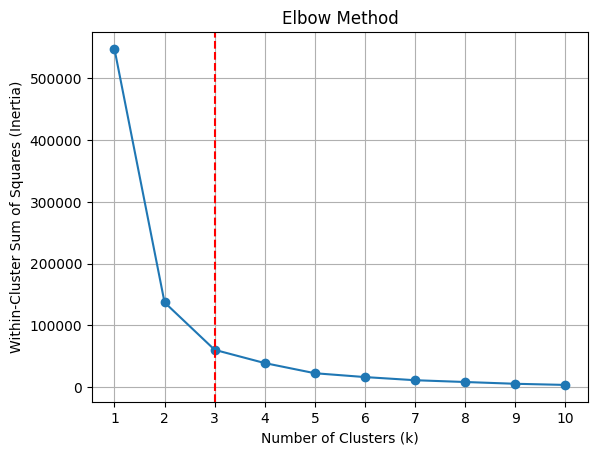

In [42]:
from sklearn.cluster import KMeans


# Define the range of clusters to test
k_values = range(1, 11)  # Test clusters from 1 to 10

# Initialize list to store the within-cluster sum of squares (inertia) for each k
inertia_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(X2)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_values)
plt.grid(True)

# Find the elbow point (optimal value of k)
optimal_k = 3  # Example, you need to determine this programmatically
plt.axvline(x=optimal_k, color='r', linestyle='--')  # Add a dotted line at the optimal value of k

plt.show()



In [46]:
from sklearn.cluster import KMeans

# Define the optimal number of clusters (k)
optimal_k = 3  # Example, replace with the actual optimal value of k

# Initialize KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the data
kmeans_optimal.fit(X2)

# Get cluster labels for each data point
cluster_labels_optimal = kmeans_optimal.labels_

# Print the cluster labels
print("Cluster Labels:", cluster_labels_optimal)

# Print the centroids of the clusters
print("Cluster Centroids:\n", kmeans_optimal.cluster_centers_)


Cluster Labels: [0 0 0 ... 1 1 1]
Cluster Centroids:
 [[ 1.08503111  2.09466878]
 [ 0.84506298  9.14560028]
 [ 1.16201835 13.8506422 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



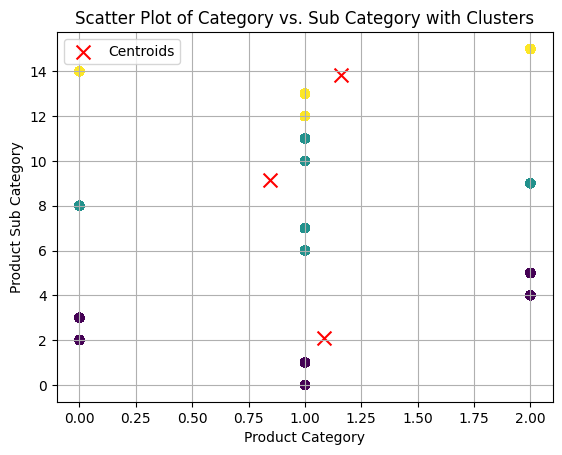

In [51]:
import matplotlib.pyplot as plt

# Scatter plot of the data points colored by cluster labels
plt.scatter(X2['category'], X2['sub_category'], c=cluster_labels_optimal, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_optimal.cluster_centers_[:, X2.columns.get_loc('category')], kmeans_optimal.cluster_centers_[:, X2.columns.get_loc('sub_category')], marker='x', c='red', s=100, label='Centroids')
plt.title('Scatter Plot of Category vs. Sub Category with Clusters')
plt.xlabel('Product Category')
plt.ylabel('Product Sub Category')
plt.legend()
plt.grid(True)
plt.show()



In [53]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(X2, cluster_labels_optimal)

# Print the silhouette score
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.639025295625784


# **Geographic Location**

In [55]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame and select the desired columns
X3 = data[['country', 'state', 'city', 'region']].copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in X3.columns:
    X3[col] = label_encoder.fit_transform(X3[col])

# Display the encoded DataFrame
print(X3.head())


   country  state  city  region
0        0      1   117       3
1        0     20   382       0
2        0     33   366       0
3        0     23   248       1
4        0     33   413       0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

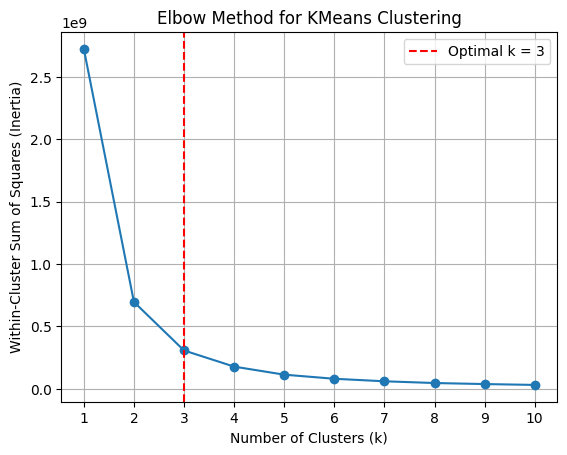

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of clusters to test
k_values = range(1, 11)  # Test clusters from 1 to 10

# Initialize list to store the within-cluster sum of squares (inertia) for each k
inertia_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    kmeans.fit(X3)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_values)
plt.grid(True)

# Find the elbow point (optimal value of k)
optimal_k = 3  # Example, you need to determine this programmatically
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')  # Add a dotted line at the optimal value of k
plt.legend()

plt.show()


In [58]:
from sklearn.cluster import KMeans

# Define the optimal number of clusters (k)
optimal_k = 3  # Example, replace with the actual optimal value of k

# Initialize KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the data
kmeans_optimal.fit(X3)

# Get cluster labels for each data point
cluster_labels_optimal = kmeans_optimal.labels_

# Print the cluster labels
print("Cluster Labels:", cluster_labels_optimal)

# Print the centroids of the clusters
print("Cluster Centroids:\n", kmeans_optimal.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster Labels: [1 1 1 ... 2 2 2]
Cluster Centroids:
 [[  0.          18.27569759 585.97305032   1.19663725]
 [  0.          18.24338192 200.6955102    1.19218659]
 [  0.          17.78940167 963.87311855   1.36298047]]


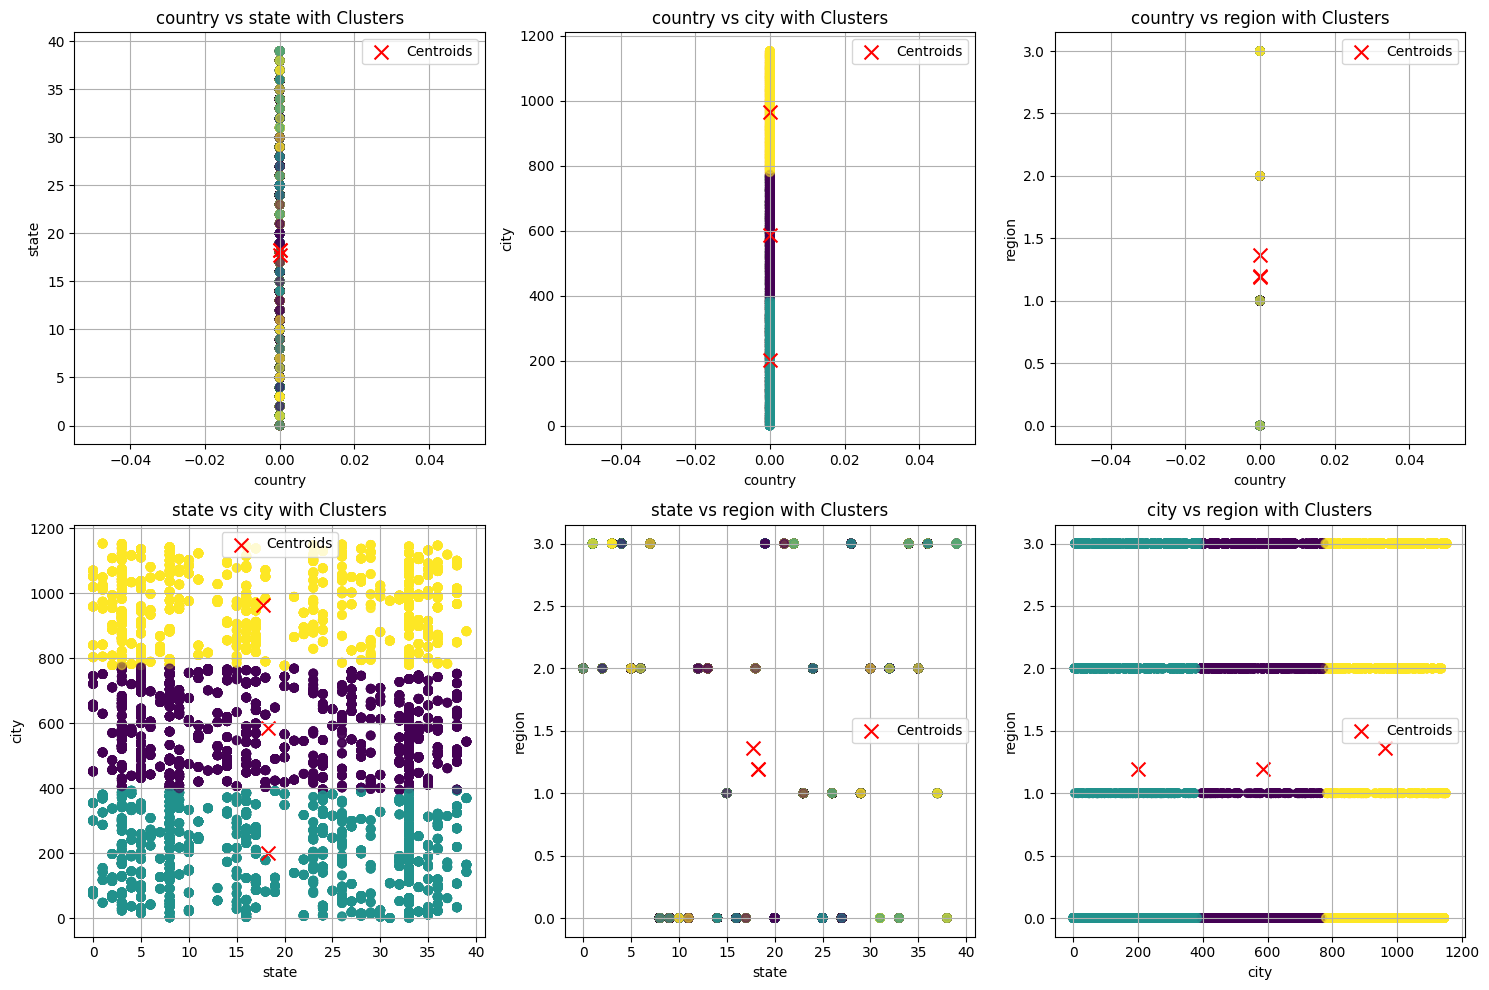

In [60]:
import itertools
import matplotlib.pyplot as plt

# Get all combinations of pairs from the features
feature_pairs = list(itertools.combinations(X3.columns, 2))

# Create subplots for each pair
num_pairs = len(feature_pairs)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_pairs + num_cols - 1) // num_cols  # Number of rows needed based on the number of pairs
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot scatter plot for each pair
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    ax.scatter(X3[x_feature], X3[y_feature], c=cluster_labels_optimal, cmap='viridis', alpha=0.5)
    ax.scatter(kmeans_optimal.cluster_centers_[:, X3.columns.get_loc(x_feature)], kmeans_optimal.cluster_centers_[:, X3.columns.get_loc(y_feature)], marker='x', c='red', s=100, label='Centroids')
    ax.set_title(f'{x_feature} vs {y_feature} with Clusters')
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [61]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(X3, cluster_labels_optimal)

# Print the silhouette score
print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.5856180581574172
